In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [3]:
def LogisticCostFunction(expected, output):
    return -1 * (sum(expected * np.log(output + 0.00000001) + (1 - expected) * np.log(1.00000001 - output)) / len(
        expected))


In [4]:
def sigmoid(output):
    return 1 / (1 + np.exp(-1 * output))

In [5]:
def logistic_regression(input, params, expected, alpha, epochs, lb):
    costarr = []
    p2 = params
    for i in range(epochs):
        result = np.dot(p2, input)
        result = np.transpose(result)
        result = sigmoid(result)
        cost = LogisticCostFunction(expected, result)
        costarr.append(cost)
        p2 = p2 -(alpha*lb*(p2))/len(result) - alpha * (np.sum(input * np.transpose((result - expected)), 1))/len(result)
    plt.plot(np.arange(0, len(costarr)), costarr)
    plt.show()
    return p2

 Load the training data

In [6]:
file = open("../data/Social_Network_Ads.csv", "r")
train = np.zeros((0, 4))
out = np.zeros((0, 1))
file.readline()
for line in file.readlines():
    words = line.split(",")
    if words[1] == 'Male':
        train = np.append(train, np.array([[1, 1, float(words[2]), float(words[3])]]), axis=0)
    else:
        train = np.append(train, np.array([[1, 0, float(words[2]), float(words[3])]]), axis=0)
    val = float(words[4][0])
    out = np.append(out, np.array([[val]]), axis=0)
train = np.transpose(train)

Data Visualization

In [7]:
def visualize(train):
    ages=train[2:3]
    mu = sum(ages[0])/len(ages[0])
    sigma = np.std(ages[0])
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma))
    plt.show()

    salaries=train[3:]
    mu = sum(salaries[0])/len(salaries[0])
    sigma = np.std(salaries[0])
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma))
    plt.show()


Scaling - normalisation

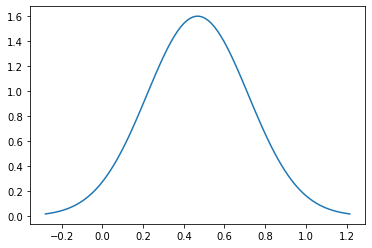

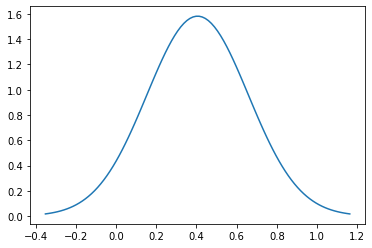

In [8]:
maxOfRows = np.transpose(np.array([np.max(train, axis=1)]))
minOfRows = np.transpose(np.array([np.min(train, axis=1)]))
trainNormalised = train - minOfRows
trainNormalised[1:] = trainNormalised[1:] / (maxOfRows[1:] - minOfRows[1:])
visualize(trainNormalised)

scaling - standardization

In [9]:
trainStandardized = train
mean = np.transpose([np.sum(trainStandardized[2:],axis=1)/len(trainStandardized[0])])
sigma = np.transpose([np.std(trainStandardized[2:],axis = 1)])
trainStandardized[2:] =(trainStandardized[2:]-mean)/sigma

split in to training and testing

In [10]:
testNormalized, trainNormalised = np.hsplit(trainNormalised, np.array([80]))
out_test_nm = out[:80]
out_train_nm = out[80:]

In [11]:
testStandardised, trainStandardized = np.hsplit(trainStandardized, np.array([80]))
out_test_std = out[:80]
out_train_std = out[80:]

Accuracy of normalised data

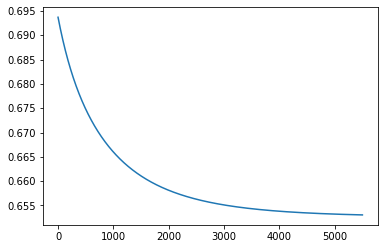

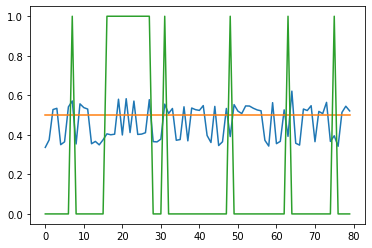

In [12]:
params = np.array([[0.01, 0.01, 0.01, 0.01]])
alpha = 0.01
params = logistic_regression(trainNormalised, params, out_train_nm, alpha, 5500,10)

predicted=sigmoid(np.transpose(np.dot(params, testNormalized)))
arr =[i for i in range(len(predicted))]
plt.plot(arr,np.transpose(predicted)[0])
plt.plot(arr,[0.5 for i in range(len(predicted))])
plt.plot(arr,out_test_nm)
plt.show()

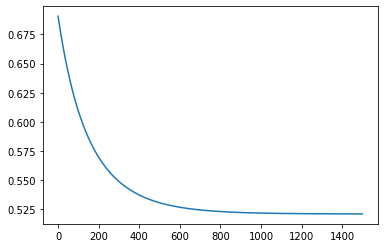

incorrect:  16.0 /80


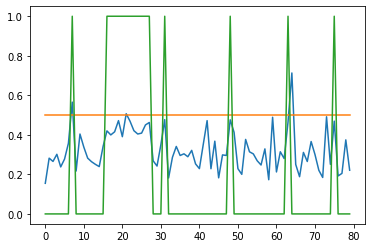

In [14]:
params = np.array([[0.01, 0.01, 0.01, 0.01]])
alpha = 0.01
params = logistic_regression(trainStandardized, params, out_train_std, alpha, 1500,100)

predicted=sigmoid(np.transpose(np.dot(params, testStandardised)))
predictedOriginal=np.floor(predicted+0.5)
error = sum(np.square(predictedOriginal-out_test_std))
print("incorrect: ",error[0],"/80")
arr =[i for i in range(len(predicted))]
plt.plot(arr,np.transpose(predicted)[0])
plt.plot(arr,[0.5 for i in range(len(predicted))])
plt.plot(arr,out_test_std)
plt.show()
